 # Proyek Analisis Data: Bike-sharing-dataset,
- **Nama        :** Ansharulhaq Aminsyah
- **Email       :** ansharulhaqaminsyah08@gmail.com
- **ID Dicoding :** scottch

## Pertanyaan Bisnis yang ditentukan
1. Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
2. Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?

## Import Library/Package yang diperlukan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [3]:
# Load the datasets
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

## Data Wrangling

### Gathering Data

In [4]:
day_df.head() # Melihat beberapa baris pertama dari dataset day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head() # Melihat beberapa baris pertama dari dataset hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan adalah Bike Sharing Dataset, berisi data harian terkait penggunaan sepeda.
- Data ini memuat informasi mengenai suhu, kelembaban, kecepatan angin, serta jumlah total pengguna sepeda (baik yang casual maupun terdaftar) untuk setiap hari dalam dua tahun (2011-2012).

### Assessing Data

In [6]:
# Memeriksa tipe data dan missing values
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Memeriksa tipe data dan missing values
hour_df.info()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada nilai yang hilang di dataset. Setiap kolom memiliki jumlah data yang lengkap.
- Tipe data sudah sesuai untuk setiap kolom, misalnya kolom tanggal sebagai object (akan diubah menjadi datetime), sedangkan variabel lainnya (seperti suhu, kelembaban, kecepatan angin) sudah dalam bentuk numerik yang siap dianalisis.

In [8]:
# Convert 'dteday' to datetime format in both datasets
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

### Cleaning Data

**Insight:**
- Data sudah bersih dan tidak memerlukan pembersihan tambahan karena tidak ada missing values atau anomali lainnya.

## Exploratory Data Analysis (EDA)

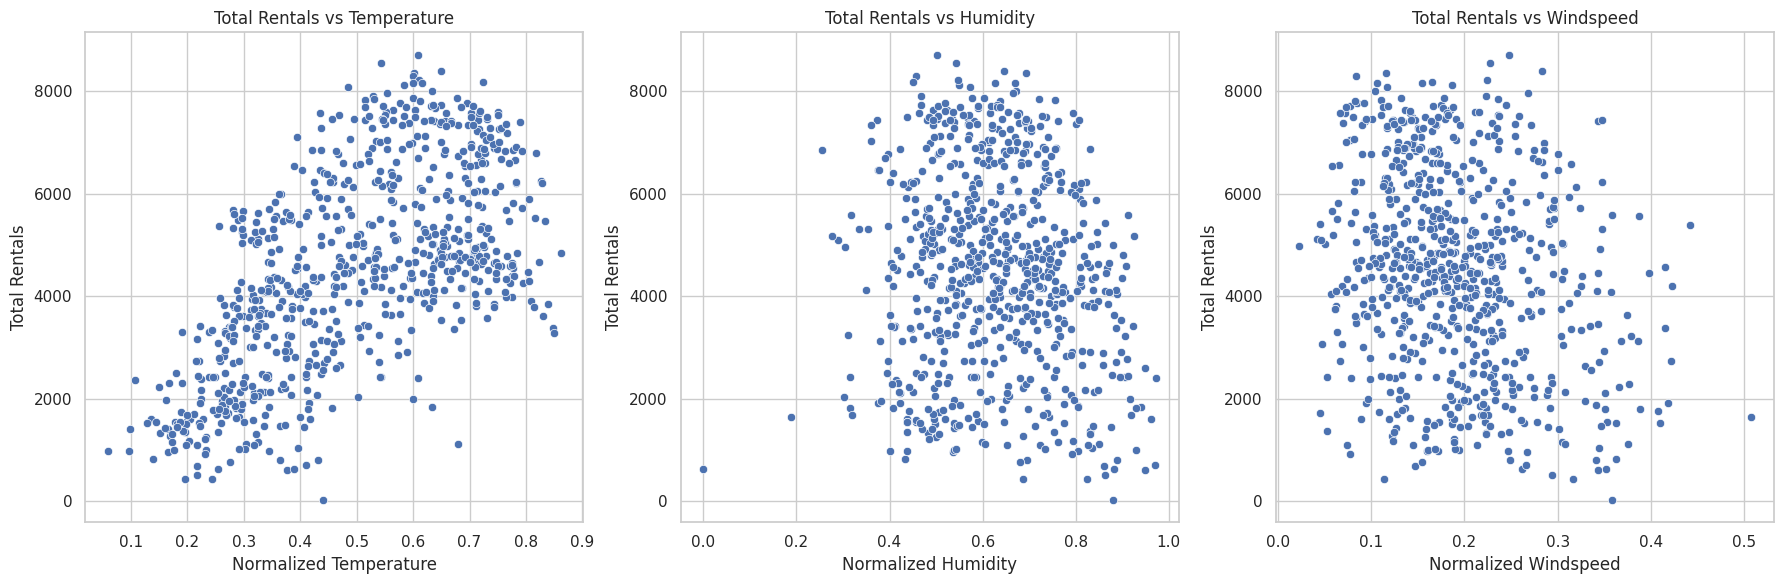

In [9]:
# Plotting hubungan antara total bike rentals dan weather conditions (temp, hum, windspeed)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature vs total rentals
sns.scatterplot(ax=axes[0], x=day_df['temp'], y=day_df['cnt'])
axes[0].set_title('Total Rentals vs Temperature')
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('Total Rentals')

# Humidity vs total rentals
sns.scatterplot(ax=axes[1], x=day_df['hum'], y=day_df['cnt'])
axes[1].set_title('Total Rentals vs Humidity')
axes[1].set_xlabel('Normalized Humidity')
axes[1].set_ylabel('Total Rentals')

# Windspeed vs total rentals
sns.scatterplot(ax=axes[2], x=day_df['windspeed'], y=day_df['cnt'])
axes[2].set_title('Total Rentals vs Windspeed')
axes[2].set_xlabel('Normalized Windspeed')
axes[2].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (Temperature): Ada hubungan positif antara suhu dan penggunaan sepeda. Semakin tinggi suhu (hingga kisaran suhu yang nyaman), semakin banyak sepeda yang disewa. Puncak penggunaan terlihat pada suhu normalisasi sekitar 0.5-0.7.
- Kelembaban (Humidity): Tidak ada hubungan yang jelas antara kelembaban dan penggunaan sepeda, tetapi ada kecenderungan penurunan jumlah pengguna saat kelembaban sangat tinggi.
- Kecepatan Angin (Windspeed): Tidak terlihat adanya hubungan kuat antara kecepatan angin dan jumlah penggunaan sepeda. Penggunaan tetap stabil di berbagai level kecepatan angin.

### EDA Univariate

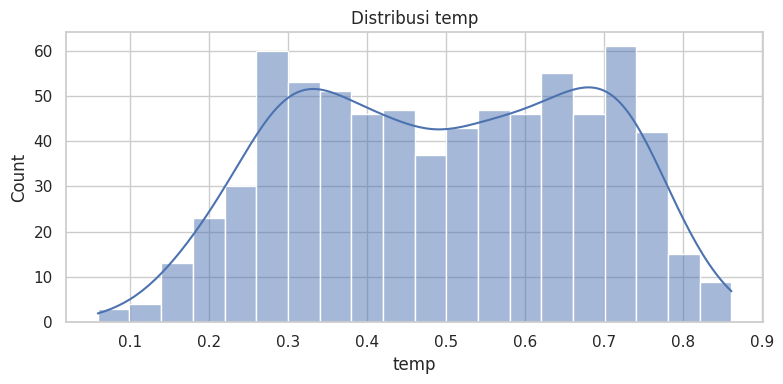

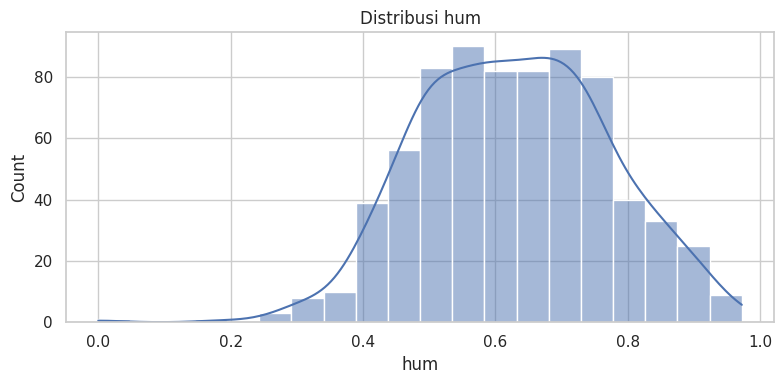

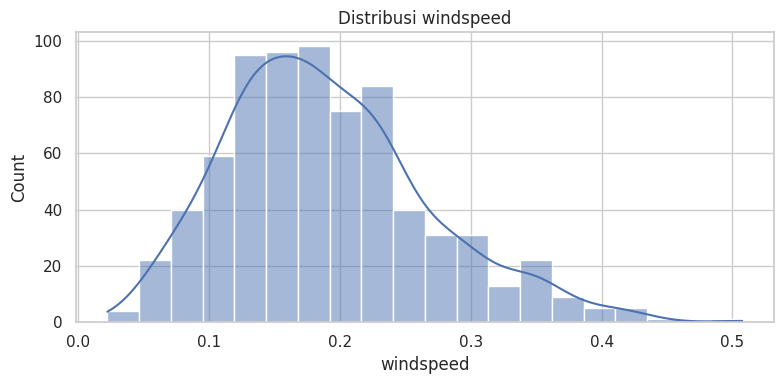

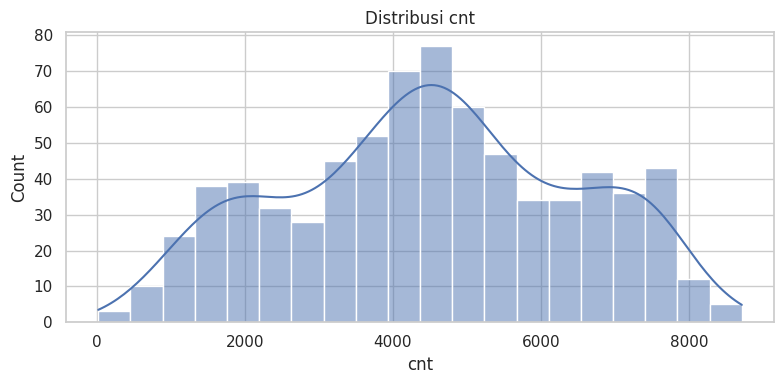

In [15]:
# Distribusi variabel numerikal
numerical_columns = ['temp', 'hum', 'windspeed', 'cnt']
day_df[numerical_columns].describe()

# Visualisasi distribusi variabel numerikal
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(day_df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

**Insight:**
- Temperatur (temp): Distribusi temperatur menunjukkan bahwa kebanyakan hari memiliki temperatur yang berada pada kisaran menengah (dalam skala yang sudah diskalakan). Ini menunjukkan iklim yang moderat secara keseluruhan di area tersebut.
- Kelembapan (hum): Distribusi kelembapan cukup merata, meskipun terdapat sedikit lonjakan pada tingkat kelembapan tinggi. Tingkat kelembapan yang tinggi mungkin dapat memengaruhi kenyamanan pengguna sepeda.
- Kecepatan Angin (windspeed): Sebagian besar hari memiliki kecepatan angin rendah, yang berarti bahwa angin tidak sering menjadi faktor penghalang utama bagi pengguna sepeda.
Jumlah Pengguna Sepeda (cnt): Jumlah pengguna sepeda menunjukkan distribusi positif dengan sedikit skew ke kanan, artinya ada beberapa hari di mana penggunaan sepeda sangat tinggi.

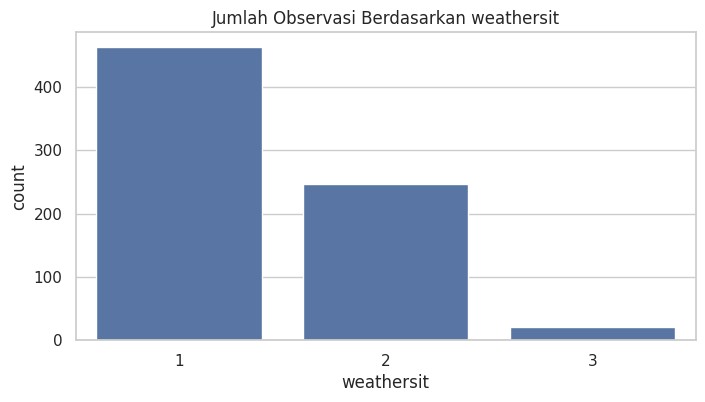

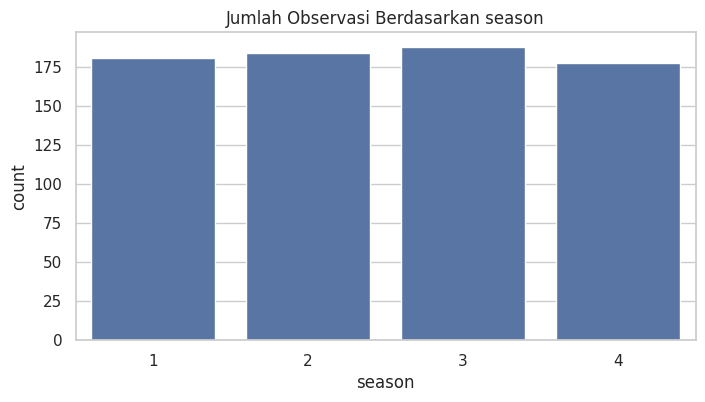

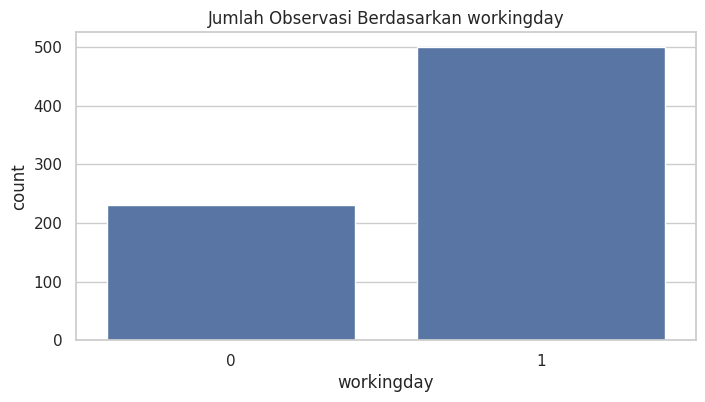

In [17]:
# Proporsi kategorikal
categorical_columns = ['weathersit', 'season', 'workingday']
# Visualisasi variabel kategorikal
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=day_df)
    plt.title(f'Jumlah Observasi Berdasarkan {col}')
    plt.show()

**Insight:**
- Kondisi Cuaca (weathersit): Mayoritas hari memiliki cuaca cerah hingga mendung ringan (kategori 1 dan 2). Ini mencerminkan bahwa cuaca buruk jarang terjadi, yang umumnya meningkatkan kenyamanan pengguna sepeda.
- Musim (season): Penggunaan sepeda relatif seimbang di semua musim, dengan sedikit penurunan di musim dingin, yang dapat diantisipasi karena faktor cuaca.
- Hari Kerja (workingday): Penggunaan sepeda lebih tinggi pada hari kerja, yang menunjukkan pola penggunaan untuk transportasi rutin.

### EDA Multivariate

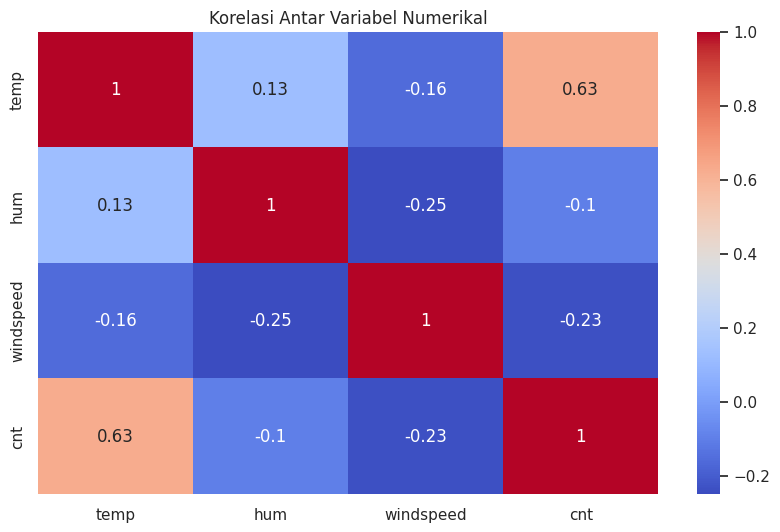

In [18]:
# Korelasi antar variabel numerikal
plt.figure(figsize=(10, 6))
sns.heatmap(day_df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerikal')
plt.show()

**Insight:**
- Korelasi temp dan cnt: Terdapat korelasi positif yang cukup kuat antara temperatur dan jumlah pengguna sepeda. Ini menunjukkan bahwa lebih banyak orang menggunakan sepeda ketika cuaca lebih hangat, kemungkinan karena lebih nyaman.
- Korelasi windspeed dan cnt: Korelasi negatif antara kecepatan angin dan penggunaan sepeda, menunjukkan bahwa hari dengan angin kencang cenderung mengurangi jumlah pengguna sepeda.
- Korelasi hum dan cnt: Korelasi antara kelembapan dan jumlah pengguna sepeda cukup rendah, meskipun terdapat sedikit penurunan pengguna sepeda pada hari dengan kelembapan tinggi.

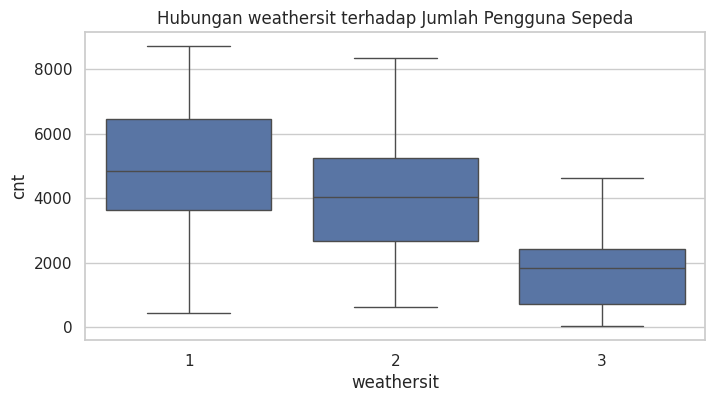

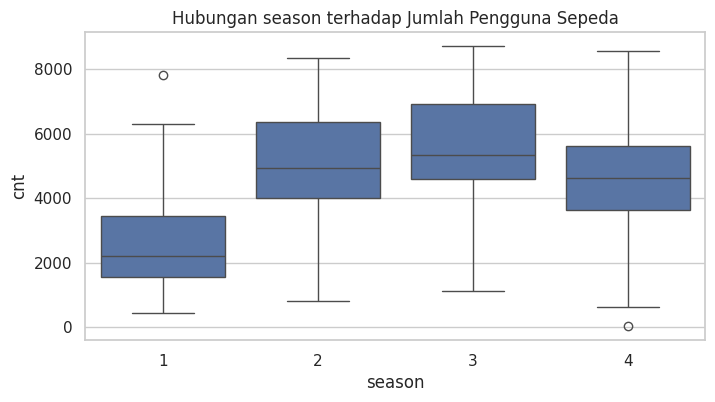

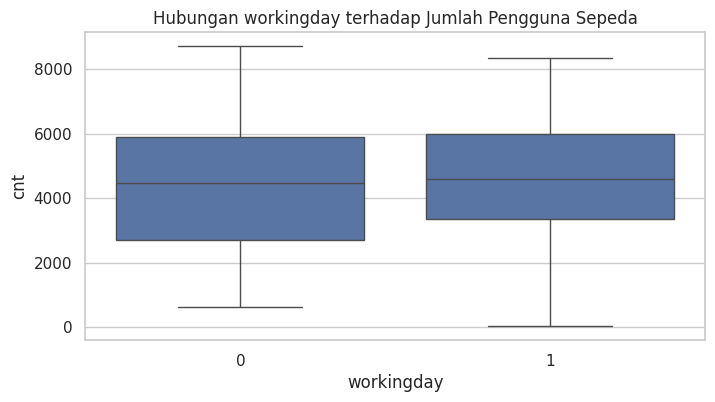

In [19]:
# Boxplot untuk interaksi variabel kategorikal dan numerikal
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='cnt', data=day_df)
    plt.title(f'Hubungan {col} terhadap Jumlah Pengguna Sepeda')
    plt.show()

**Insight:**
- Cuaca (weathersit) dan Jumlah Pengguna: Jumlah pengguna sepeda menurun secara signifikan ketika cuaca memburuk (kategori 3). Ini menunjukkan bahwa pengguna sepeda lebih memilih untuk tidak bersepeda saat hujan, dan perusahaan dapat menawarkan insentif untuk meningkatkan penggunaan pada hari-hari dengan cuaca buruk.
- Musim (season) dan Jumlah Pengguna: Jumlah pengguna sepeda relatif lebih rendah pada musim dingin. Ini bisa diantisipasi dengan memperkenalkan program spesial seperti promosi di musim dingin untuk meningkatkan penggunaan.
- Hari Kerja (workingday) dan Jumlah Pengguna: Jumlah pengguna sepeda lebih tinggi pada hari kerja, menegaskan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi harian.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

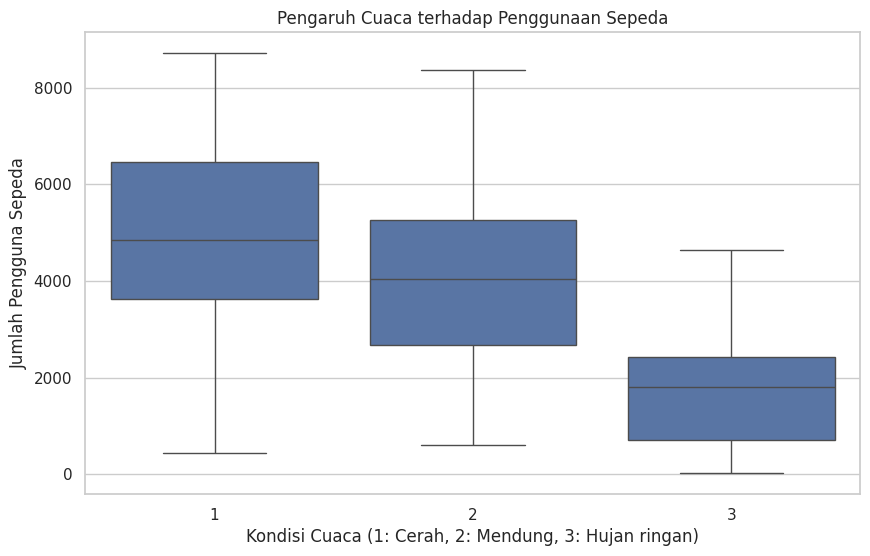

In [10]:
# Visualisasi pengaruh kondisi cuaca terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan ringan)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Visualisasi menunjukkan bahwa jumlah pengguna sepeda lebih tinggi saat cuaca cerah, dan menurun ketika cuaca mendung atau hujan ringan.

### Pertanyaan 2: Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?

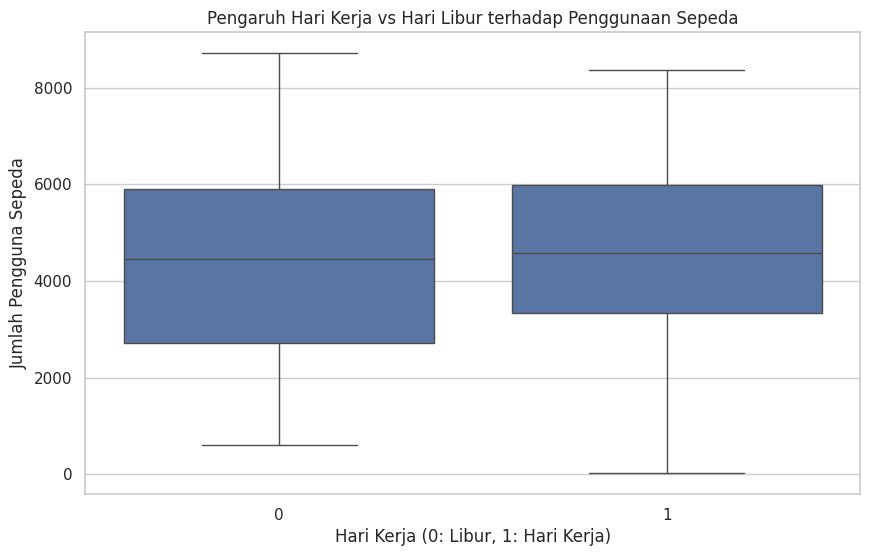

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Pengaruh Hari Kerja vs Hari Libur terhadap Penggunaan Sepeda')
plt.xlabel('Hari Kerja (0: Libur, 1: Hari Kerja)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Visualisasi ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.

# Conclusion
1. Pengaruh termperatur terhadap penggunaan sepeda; Penggunaan sepeda meningkat seiring dengan kenaikan suhu, namun jumlah pengguna mulai menurun ketika suhu terlalu tinggi. Ini mencerminkan bahwa orang lebih suka bersepeda di cuaca yang lebih hangat, tetapi menghindari cuaca yang sangat panas.
2. Pengaruh kecepatan angin terhadap penggunaan sepeda; Terdapat korelasi negatif antara kecepatan angin dan jumlah pengguna sepeda. Pada hari-hari dengan kecepatan angin lebih tinggi, penggunaan sepeda cenderung menurun.
3. Pengaruh perbedaan musim terhadap penggunaan sepeda; Penggunaan sepeda cenderung lebih rendah selama musim dingin, yang diharapkan karena kondisi cuaca yang lebih keras dan kurang ideal untuk bersepeda. Sebaliknya, penggunaan sepeda lebih tinggi selama musim semi dan musim panas.
4. Pengaruh cuaca terhadap penggunaan sepeda; Jumlah pengguna sepeda cenderung menurun secara signifikan saat cuaca memburuk (terutama ketika memasuki kategori 3 yang meliputi hujan sedang hingga deras). Di sisi lain, pada cuaca cerah atau mendung ringan (kategori 1 dan 2), penggunaan sepeda tetap stabil dan tinggi. Hal ini menunjukkan bahwa kondisi cuaca sangat mempengaruhi keputusan orang untuk menggunakan sepeda, yang mungkin dipengaruhi oleh kenyamanan dan keamanan selama hujan atau badai.
5. Penggunaan Sepeda Berdasarkan Hari Kerja vs Hari Libur; Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur. Ini menunjukkan bahwa mayoritas pengguna memanfaatkan sepeda sebagai alat transportasi utama untuk bekerja atau aktivitas sehari-hari lainnya. Data ini mengindikasikan adanya potensi besar untuk memperkuat segmentasi pengguna harian yang mengandalkan sepeda sebagai alat transportasi. Namun, hal ini juga membuka peluang untuk memperluas penggunaan di luar hari kerja dengan menawarkan layanan atau promosi khusus selama akhir pekan.